<a href="https://colab.research.google.com/github/kreshuklab/teaching-dl-course-2019/blob/master/Webinars/exercise1/ReadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation for a classification model

In this notebook, we will download training data from the 

TODO:
- use cifar or mnist?
- set up google colab links for the new notebooks following: https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb
- test that everything works for colab and google drive

## Import necessary libraries

In [1]:
import numpy as np   # Package for scientific computing
import matplotlib.pyplot as plt  # 2D plotting library
import os  # Using operating system
from imageio import imread  # read images
from skimage.transform import resize  # resize images
from tqdm import tqdm   # Progress bar library
import random  # Generating Random Numbers
import pickle # Serializing and de-serializing a Python object structure

In [2]:
# install helper function to extract cifar images
!pip install cifar2png

  Using cached cifar2png-0.0.4.tar.gz (5.8 kB)
  Using cached pathlib-1.0.1.tar.gz (49 kB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached tqdm-4.48.2-py2.py3-none-any.whl (68 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached urllib3-1.25.10-py2.py3-none-any.whl (127 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Created wheel for cifar2png: filename=cifar2png-0.0.4-py3-none-any.whl size=5932 sha256=e87c0d97fb8fddad5f4cf813f8d2a15e57e7366ffa1b8d80569525d466506398
  Stored in directory: /home/pape/.cache/pip/wheels/74/98/2e/cc61a90cf96d657a7e7384904658ae7b561514c117af9438cc
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14348 sha256=f760e5383e3ef5fcaae46c2a9744070e3905df45f7f9242274b0d5fdc1e86c41
  Stored in directory: /home/pape/.cache/pip/wheels/59/02/2f/ff4a3e16a518feb111ae1405908094483ef56fec0dfa39e571
Successfully built cifar2png pathlib


## Download the data

aa

In [0]:
# RUN THIS IF YOU USE THIS NOTEBOOK IN GOOGLE COLAB

# connect to your google drive
from google.colab import drive
root = '/content/gdrive/'
drive.mount(root)

# create a permanent directory in your google drive to save the data
cifar_dir = os.path.join(root, '/My Drive/drive_ml/2020_ml_school/02_cifar')
os.makedirs(cifar_dir, exist_ok=True)

In [2]:
# RUN THIS IF YOU USE THIS NOTEBOOK LOCALLY
cifar_dir = './cifar10'
os.makedirs(cifar_dir, exist_ok=True)

In [5]:
# download the cifar data
# import urllib
# cifar_source = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
# urllib.request.urlretrieve(cifar_source, "cifar.tar.gz")

('cifar.tar.gz', <http.client.HTTPMessage at 0x7f29b33e8f10>)

In [3]:
!cifar2png cifar10 cifar10

output dir `cifar10` already exists. Please specify a different output path


## Reading the cifar data

Data layout: 

```
train/
  airplane/
    001.png
    002.png
    ...
  automobile/
    001.png
    002.png
    ...
```

In [12]:
# expolore the data
# data_dir = cifar_dir_path  
data_dir = "cifar10/train" # for people working on cifar the data is stored locally

categories = os.listdir(data_dir)
print(categories)

['truck', 'cat', 'airplane', 'ship', 'deer', 'horse', 'bird', 'automobile', 'frog', 'dog']


In [16]:
images = []
labels = []
for label_id, category in tqdm(enumerate(categories), total=len(categories)):
    category_dir = os.path.join(data_dir, category)
    image_names = os.listdir(category_dir)
    for im_name in image_names:
        im_file = os.path.join(category_dir, im_name)
        images.append(imread(im_file))
        labels.append(label_id)
print("Number of images:", len(images))
print("Number of labels:", len(labels))

100%|██████████| 10/10 [00:12<00:00,  1.23s/it]

Number of images: 50000
Number of labels: 50000


## Visualisation

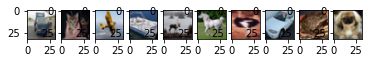

In [22]:
# plot an image for each category
fig, ax = plt.subplots(1, 10)
for label_id, category in enumerate(categories):
    ax[label_id].imshow(images[labels.index(label_id)])
    # ax[label_id].set_title(category)
plt.show()

# Image manipulations, filters